In [20]:
import tensorflow as tf
import os
from PIL import Image

In [21]:
# from google.colab import drive #google drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
# drive.mount('/content/drive/') #google drive

In [23]:
# enable GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [24]:
path = "./images"
file_list = os.listdir(path)
train_dataset = path + "/train"
validation_dataset = path + "/validation"


In [25]:
# def verify_images_in_directory(directory):
#     invalid_images = []
#     for root, _, files in os.walk(directory):
#         for file in files:
#             file_path = os.path.join(root, file)
#             try:
#                 img = Image.open(file_path)
#                 img.verify()  # Verifies that it is, in fact, an image
#             except (IOError, SyntaxError) as e:
#                 print(f"Invalid image file: {file_path} - {e}")
#                 invalid_images.append(file_path)
#     return invalid_images

In [26]:
# Verifikasi gambar dalam direktori train dan validation
# invalid_train_images = verify_images_in_directory(train_dataset)
# invalid_val_images = verify_images_in_directory(validation_dataset)

# print(f"Invalid images in train directory: {invalid_train_images}")
# print(f"Invalid images in validation directory: {invalid_val_images}")


In [27]:
train_subdirs = os.listdir(train_dataset)
val_subdirs = os.listdir(validation_dataset)

In [28]:
num_classes = len(train_subdirs)
assert num_classes == len(val_subdirs), "Number of classes in training and validation directories must match."

print(f"Number of classes: {num_classes}")

Number of classes: 7


In [29]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [30]:
# set img width
img_width, img_height = 256, 256
batch_size = 32

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(
    train_dataset,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dataset,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 34546 images belonging to 7 classes.
Found 8978 images belonging to 7 classes.


In [33]:
# Create CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

In [34]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [35]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train Model

In [37]:
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

In [38]:
epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[tensorboard_callback, early_stopping]
    )

Epoch 1/20
1079/1079 [==============================] - 86s 78ms/step - loss: 1.7153 - accuracy: 0.3115 - val_loss: 1.4533 - val_accuracy: 0.4346
Epoch 2/20
1079/1079 [==============================] - 84s 78ms/step - loss: 1.4769 - accuracy: 0.4273 - val_loss: 1.2799 - val_accuracy: 0.5190
Epoch 3/20
1079/1079 [==============================] - 84s 78ms/step - loss: 1.3357 - accuracy: 0.4890 - val_loss: 1.1198 - val_accuracy: 0.6075
Epoch 4/20
1079/1079 [==============================] - 84s 78ms/step - loss: 1.2038 - accuracy: 0.5411 - val_loss: 0.9466 - val_accuracy: 0.6722
Epoch 5/20
1079/1079 [==============================] - 84s 78ms/step - loss: 1.0674 - accuracy: 0.5887 - val_loss: 0.8465 - val_accuracy: 0.7209
Epoch 6/20
1079/1079 [==============================] - 84s 77ms/step - loss: 0.9397 - accuracy: 0.6396 - val_loss: 0.7248 - val_accuracy: 0.7708
Epoch 7/20
1079/1079 [==============================] - 84s 78ms/step - loss: 0.8335 - accuracy: 0.6789 - val_loss: 0.6490 -

In [39]:
import matplotlib.pyplot as plt

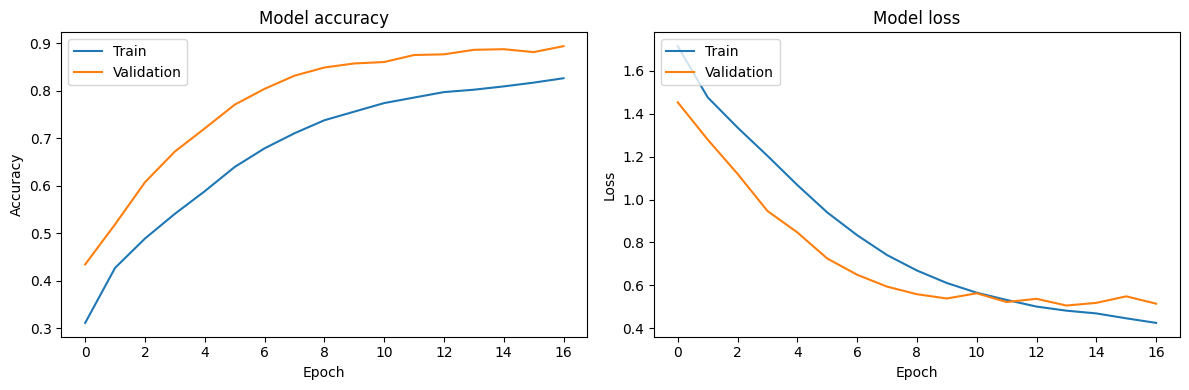

In [40]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Validation

In [41]:
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

281/281 [==============================] - 9s 31ms/step - loss: 0.5061 - accuracy: 0.8861
Test accuracy: 0.8860548138618469


In [42]:
# model_save_path = "/content/drive/MyDrive/Deep Learning/emotion_detection_model.h5"
model_save_path = "./model/emotion_detection_model.keras"

In [43]:
model.save(model_save_path)

testing

In [44]:
test_images_dir = path + "/testing"
file_list = os.listdir(test_images_dir)
print(file_list )

['ad67763ae73fa1edd2e4643558c23add.jpg', 'dataset.png', 'FB_IMG_1718031240801.jpg', 'Screenshot 2024-06-13 212447.png', 'Screenshot 2024-06-16 152847.png', 'WhatsApp Image 2024-06-13 at 21.06.14_49a40173.jpg', 'WhatsApp Image 2024-06-16 at 15.30.55_2732fd3c.jpg']


In [45]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

In [46]:

class_labels = ['bahagia', 'marah', 'sedih', 'terkejut', 'takut', 'jijik', 'netral']

In [47]:
# model_path = "/content/drive/MyDrive/Deep Learning/emotion_detection_model.h5" #google drive
model_path = model_save_path
model = load_model(model_path)

In [48]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalisasi gambar

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return class_labels[predicted_class[0]]

# Step 7: Menampilkan gambar dengan prediksi
def display_predictions(test_images_dir, num_images=5):
    test_image_files = [f for f in os.listdir(test_images_dir) if os.path.isfile(os.path.join(test_images_dir, f))]
    selected_images = np.random.choice(test_image_files, num_images, replace=False)

    plt.figure(figsize=(15, 15))

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(test_images_dir, image_file)
        predicted_label = predict_image(image_path)

        plt.subplot(1, num_images, i + 1)
        img = load_img(image_path, target_size=(img_width, img_height))
        plt.imshow(img)
        plt.title(f"Prediksi: {predicted_label}")
        plt.axis('off')

    plt.show()



In [49]:
# Step 7: Melakukan prediksi untuk setiap gambar dalam folder testing
test_image_files = [f for f in os.listdir(test_images_dir) if os.path.isfile(os.path.join(test_images_dir, f))]
for image_file in test_image_files:
    image_path = os.path.join(test_images_dir, image_file)
    predicted_label = predict_image(image_path)
    print(f"Gambar: {image_file} -> Prediksi: {predicted_label}")

1/1 [==============================] - 1s 598ms/step
Gambar: ad67763ae73fa1edd2e4643558c23add.jpg -> Prediksi: takut
1/1 [==============================] - 0s 15ms/step
Gambar: dataset.png -> Prediksi: netral
1/1 [==============================] - 0s 15ms/step
Gambar: FB_IMG_1718031240801.jpg -> Prediksi: takut
1/1 [==============================] - 0s 15ms/step
Gambar: Screenshot 2024-06-13 212447.png -> Prediksi: bahagia
1/1 [==============================] - 0s 14ms/step
Gambar: Screenshot 2024-06-16 152847.png -> Prediksi: terkejut
1/1 [==============================] - 0s 15ms/step
Gambar: WhatsApp Image 2024-06-13 at 21.06.14_49a40173.jpg -> Prediksi: bahagia
1/1 [==============================] - 0s 15ms/step
Gambar: WhatsApp Image 2024-06-16 at 15.30.55_2732fd3c.jpg -> Prediksi: bahagia


1/1 [==============================] - 0s 14ms/step


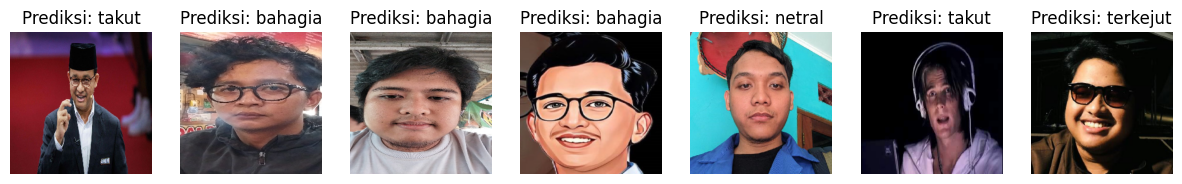

In [50]:
display_predictions(test_images_dir, num_images=7)